In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats

In [5]:
dataset = pd.read_csv("Employee task 3.csv")
df = pd.DataFrame(dataset)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
for column in df.columns:
    unique_values = df[column].unique()  # Get unique values
    unique_count = df[column].nunique()  # Get number of unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {unique_count}\n")

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [11]:
# To get unique values and frequency of each value in the column
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print(f"Number of Unique Values: {df[column].nunique()}\n")

Column: Company
Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
Number of Unique Values: 6

Column: Age
Age
22.0    16
33.0    13
44.0    10
23.0     8
34.0     8
21.0     8
32.0     7
35.0     6
0.0      6
41.0     5
45.0     4
43.0     4
24.0     4
20.0     3
31.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64
Number of Unique Values: 29

Column: Salary
Salary
3000.0    9
5000.0    6
8202.0    5
5034.0    5
4034.0    5
2300.0    4
5835.0    4
8787.0    4
9024.0    4
2934.0    4
9284.0    4
8345.0    4
8943.0    4
7084.0    4
2034.0    4
4824.0    4
3045.0    4
3184.0    4
1234.0    4
1089.0    4
9000.0    3
6000.0    3
7000.0    3
8000.0    3
3030.0    3
4000.0    2
7654.0

In [13]:
# Get basic statistics for numerical features
summary_statistics = df.describe()
print(summary_statistics)

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [15]:
# Calculate mode for each numerical feature
modes = df.mode().iloc[0]
print("Mode for each feature:",modes)


Mode for each feature: Company       TCS
Age          22.0
Salary     3000.0
Place      Mumbai
Country     India
Gender          0
Name: 0, dtype: object


In [29]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [39]:
inappropriate_values = (df['Age'] == 0).sum()
print(f"Number of inappropriate '0' values in 'Age': {inappropriate_values}")


Number of inappropriate '0' values in 'Age': 6


In [41]:
# Replace zeros in the 'age' column with NaN
df['Age'].replace(0, pd.NA, inplace=True)

# Verify replacement
print(df['Age'].isnull().sum())  # This should now include the zeros as NaN

24


In [43]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [45]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


#### Handling Missing Values:
Now that you have identified missing values (including the newly replaced NaN values), you can decide how to handle them. Common approaches include:
Removing Rows: Remove rows with missing values.
Replacing with Mean/Median/Mode: Replace missing values with the mean, median, or mode of the column.

In [48]:
#  Remove rows with missing values
df.dropna(inplace=True)


In [52]:
# Replace missing values with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [54]:
# Replace missing values with the median of the column
df['Age'].fillna(df['Age'].median(), inplace=True)


In [58]:
#  Replace missing values with the median of the column
df['Age'].fillna(df['Age'].median(), inplace=True)


In [60]:
# Check for any remaining missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values after handling:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


### Identify Duplicate Rows:

In [63]:
duplicates = df.duplicated()
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
     Company   Age  Salary     Place Country  Gender
130      TCS  21.0  4824.0    Mumbai   India       0
144  Infosys  22.0  8787.0  Calcutta   India       1


### Count Duplicate Rows:

In [66]:
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 2


### Remove duplicate rows

In [69]:
df_cleaned = df.drop_duplicates()

In [71]:
print("DataFrame after removing duplicates:")
print(df_cleaned)

DataFrame after removing duplicates:
             Company   Age  Salary     Place Country  Gender
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
7            Infosys  23.0  7000.0    Mumbai   India       1
8                TCS  34.0  8000.0  Calcutta   India       1
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[85 rows x 6 columns]


In [73]:
# Verify Removal
print(f"Number of duplicates after removal: {df_cleaned.duplicated().sum()}")

Number of duplicates after removal: 0


In [78]:
df

,Company,Age,Salary,Place,Country,Gender
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


 ###  Detecting Outliers Using IQR (Interquartile Range)

In [96]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3 - Q1

print("Q1:\n", Q1)
print("Q3:\n",Q3)
print("IQR:\n", IQR)

Q1:
 3000.0
Q3:
 8000.0
IQR:
 5000.0


### Define Outlier Boundaries:

In [99]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

Lower Bound:
 -4500.0
Upper Bound:
 15500.0


### Identify Outliers:

In [ ]:
outliers = ((df < lower_bound) | (df > upper_bound))
print("Outliers:\n", outliers)

In [ ]:
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

### Detecting Outliers Using Z-Score

In [111]:
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))  # Apply to numerical columns
abs_z_scores = abs(z_scores)

print("Z-Scores:\n", abs_z_scores)

Z-Scores:
        Salary    Gender
2    1.012973  0.546358
3    0.749656  0.546358
4    0.373490  0.546358
7    0.755009  1.830301
8    1.131175  1.830301
..        ...       ...
143  1.516370  1.830301
144  1.427218  1.830301
145  0.360700  1.830301
146  0.015466  1.830301
147  1.207161  0.546358

[87 rows x 2 columns]


In [113]:
# Identify outliers where Z-score > 3
outliers = (abs_z_scores > 3).any(axis=1)
print("Outliers:\n", df[outliers])

Outliers:
 Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


### Data Analysis

In [120]:
filtered_df = df[(df['Age']>40) & (df['Salary']<5000)]
print(filtered_df)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


### Scatter plot using matplotlib



In [ ]:
#  Set the figure size
# Add a grid for better readability

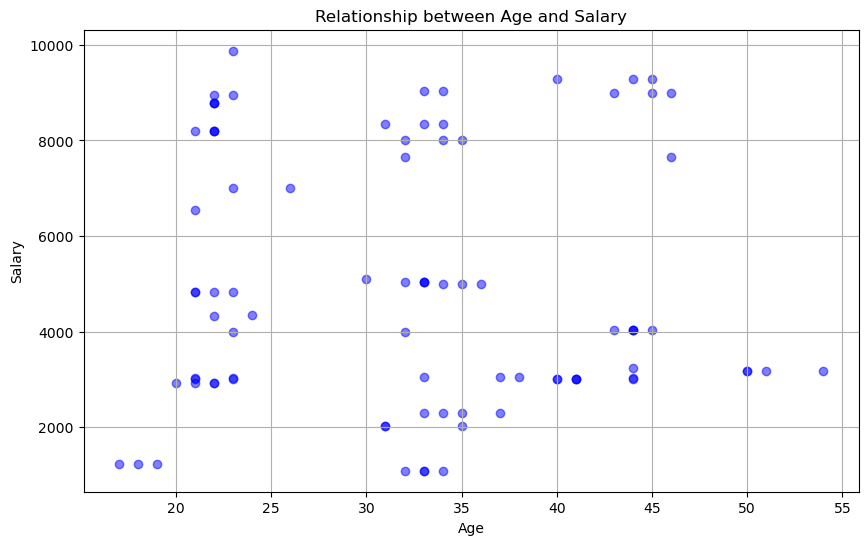

In [123]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.5)

plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True) 
plt.show()

### Count the Number of People from Each Location

In [128]:
location_counts = df['Place'].value_counts()

print("Counts of People from Each Location:\n", location_counts)


Counts of People from Each Location:
 Place
Mumbai        23
Calcutta      22
Delhi         11
Cochin        10
Noida          6
Chennai        5
Hyderabad      5
Podicherry     2
Bhopal         1
Nagpur         1
Pune           1
Name: count, dtype: int64


#### Representation of the above count using Bar Chart

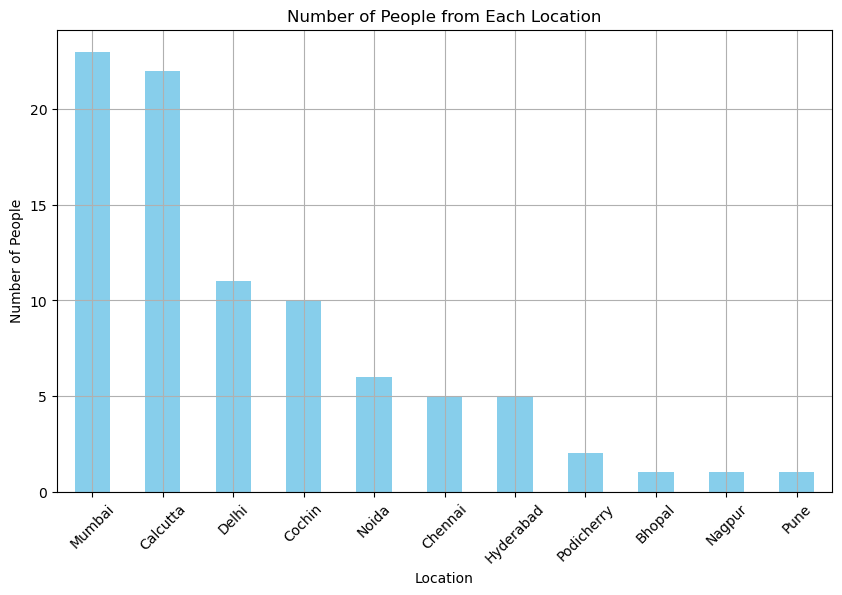

In [131]:
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')

plt.title('Number of People from Each Location')
plt.xlabel('Location')
plt.ylabel('Number of People')
plt.xticks(rotation=45)  # Rotate location names for better readability
plt.grid(True)
plt.show()


#### Representation of the above count using Pie Chart

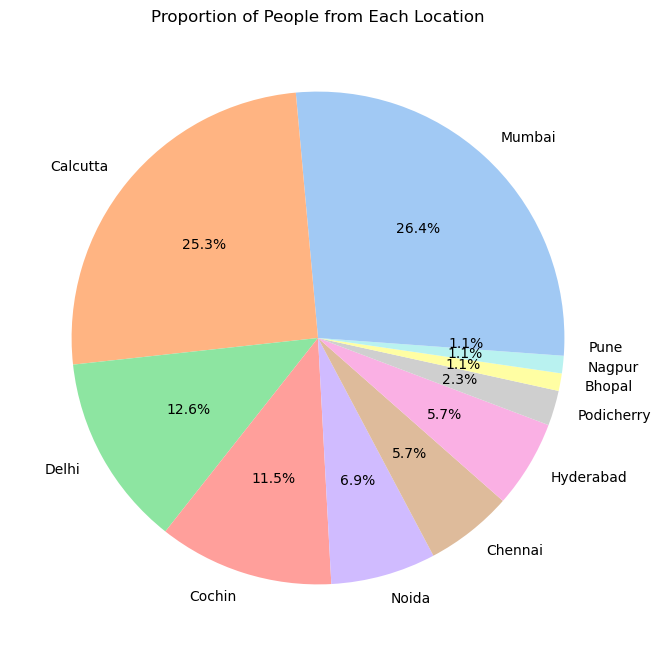

In [138]:
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(location_counts)))

plt.title('Proportion of People from Each Location')
plt.show()

##### Converting categorical variables into numerical representations is a crucial step in preparing data for machine learning models. 
      Two common methods for this are One-Hot Encoding and Label Encoding. Here's how to do both in Python using the pandas and sklearn libraries.

      1. One-Hot Encoding
       One-Hot Encoding converts each category into a new binary column (0 or 1). This is useful when the categorical variable does not have an inherent order.

In [141]:
one_hot_encoded_df = pd.get_dummies(df, columns=['Place'], prefix='location')

print("One-Hot Encoded DataFrame:\n", one_hot_encoded_df.head())

One-Hot Encoded DataFrame:
    Company   Age  Salary Country  Gender  location_Bhopal  location_Calcutta  \
2      TCS  35.0  2300.0   India       0            False               True   
3  Infosys  40.0  3000.0   India       0            False              False   
4      TCS  23.0  4000.0   India       0            False              False   
7  Infosys  23.0  7000.0   India       1            False              False   
8      TCS  34.0  8000.0   India       1            False               True   

   location_Chennai  location_Cochin  location_Delhi  location_Hyderabad  \
2             False            False           False               False   
3             False            False            True               False   
4             False            False           False               False   
7             False            False           False               False   
8             False            False           False               False   

   location_Mumbai  location_Nagpu

##### Label Encoding
Label Encoding converts each category into a numerical label (e.g., 0, 1, 2, ...). 
This method is useful when the categorical variable has a natural order, but be cautious as it can introduce unintended ordinal relationships.

In [148]:
# Assuming you want to label encode the 'location' column
label_encoder = LabelEncoder()

# Fit and transform the 'location' column
df['location_encoded'] = label_encoder.fit_transform(df['Place'])


In [150]:
print("Label Encoded DataFrame:\n", df[['Place', 'location_encoded']].head())

Label Encoded DataFrame:
       Place  location_encoded
2  Calcutta                 1
3     Delhi                 4
4    Mumbai                 6
7    Mumbai                 6
8  Calcutta                 1


#### Feature scaling is an essential step in preparing data for machine learning, especially when the features have different ranges.
##### Two common methods for feature scaling are StandardScaler and MinMaxScaler. Here's how to apply both using the sklearn.preprocessing module.

#### 1. StandardScaler
The StandardScaler standardizes features by removing the mean and scaling to unit variance. 
    The result is a distribution with a mean of 0 and a standard deviation of 1.

In [153]:
scaler = StandardScaler()

# Apply StandardScaler to the numeric columns
scaled_features = scaler.fit_transform(df[['Age', 'Salary', 'location_encoded']])

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['age_scaled', 'salary_scaled', 'location_encoded_scaled'])

print("Standard Scaled DataFrame:\n", scaled_df.head())

Standard Scaled DataFrame:
    age_scaled  salary_scaled  location_encoded_scaled
0    0.283003      -1.012973                -1.231985
1    0.818249      -0.749656                -0.018596
2   -1.001585      -0.373490                 0.790330
3   -1.001585       0.755009                 0.790330
4    0.175954       1.131175                -1.231985


### MinMaxScaler

In [156]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Salary', 'location_encoded']])
scaled_df = pd.DataFrame(scaled_features, columns=['age_scaled', 'salary_scaled', 'location_encoded_scaled'])

In [158]:
print("Minmax Scaled DataFrame:\n", scaled_df.head())

Minmax Scaled DataFrame:
    age_scaled  salary_scaled  location_encoded_scaled
0    0.486486       0.137817                      0.1
1    0.621622       0.217480                      0.4
2    0.162162       0.331285                      0.6
3    0.162162       0.672698                      0.6
4    0.459459       0.786503                      0.1
